<a href="https://colab.research.google.com/github/JapneetDataDeveloper/Classification_of_fish_species/blob/main/Classification_of_fish_species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
pip install pycaret

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [30]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/JapneetDataDeveloper/Classification_of_fish_species/main/Fish_dataset.csv')
df.head(25)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [32]:
print("length of data",len(df))
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())
df=df.dropna(how="any")

length of data 159
Number of duplicated rows is:  0
Number of rows with NaNs is:  0


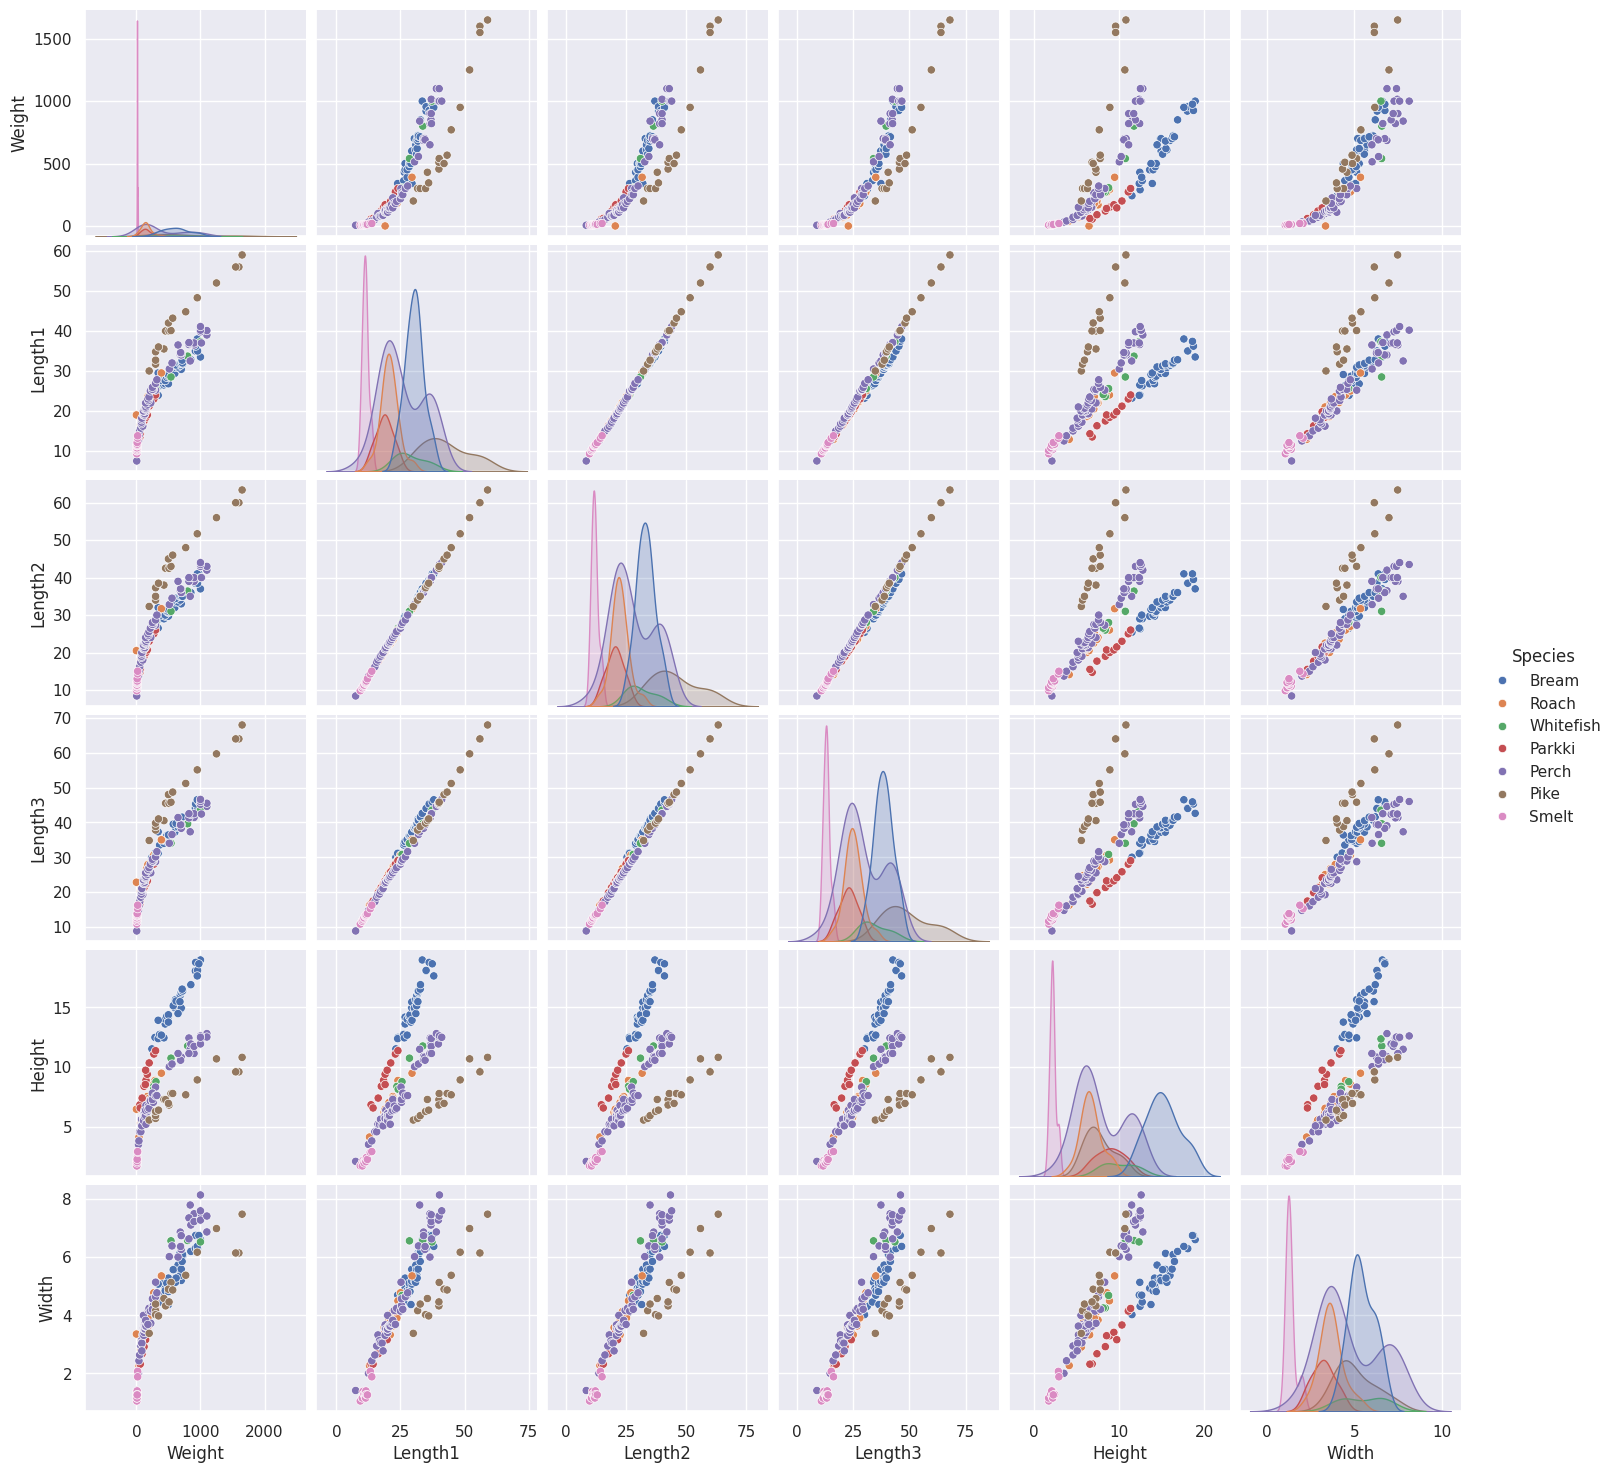

In [33]:
sns.pairplot(df, hue='Species')
plt.show()

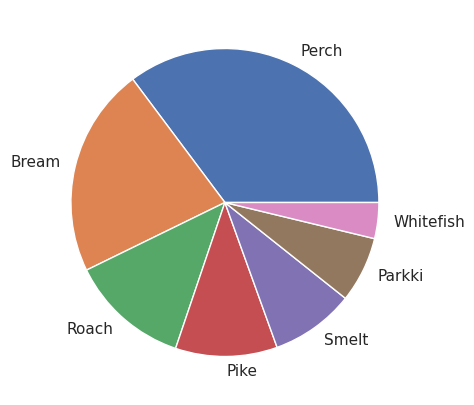

In [34]:
y =df['Species']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [35]:
X = df.drop(columns=['Species'])
X.head(10)

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
5,450.0,26.8,29.7,34.7,13.6024,4.9274
6,500.0,26.8,29.7,34.5,14.1795,5.2785
7,390.0,27.6,30.0,35.0,12.6700,4.6900
8,450.0,27.6,30.0,35.1,14.0049,4.8438
9,500.0,28.5,30.7,36.2,14.2266,4.9594


In [36]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [37]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,Weight,Length1,Length2,Length3,Height,Width
0,-0.438072,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,-0.098995,0.005302,0.054694,0.196390,0.879771,0.022621
4,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371
5,0.144804,0.055477,0.120222,0.300074,1.083951,0.303431
6,0.284919,0.055477,0.120222,0.282793,1.219018,0.512358
7,-0.023333,0.135759,0.148305,0.325995,0.865729,0.162163
8,0.144804,0.135759,0.148305,0.334635,1.178154,0.253684
9,0.284919,0.226075,0.213832,0.429678,1.230041,0.322473


In [38]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,1.955110e-17,1.00316,-1.116227,-0.779952,-0.351201,0.705263,3.507554
Length1,159.0,-1.061345e-16,1.00316,-1.881310,-0.722248,-0.105085,0.647552,3.286801
Length2,159.0,-1.452367e-16,1.00316,-1.873679,-0.694189,-0.104443,0.663162,3.274892
Length3,159.0,-7.820439e-17,1.00316,-1.937763,-0.697880,-0.157862,0.727768,3.177292
Height,159.0,4.468822e-17,1.00316,-1.695083,-0.708261,-0.277340,0.794556,2.337161
Width,159.0,-2.793014e-16,1.00316,-2.005294,-0.614007,-0.100557,0.694447,2.216321


In [39]:
observations = list(df.index)
variables = list(df.columns)

FixedFormatter should only be used together with FixedLocator


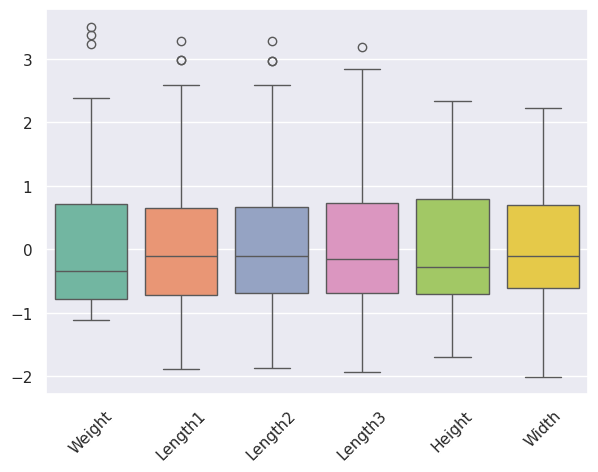

In [40]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

FixedFormatter should only be used together with FixedLocator


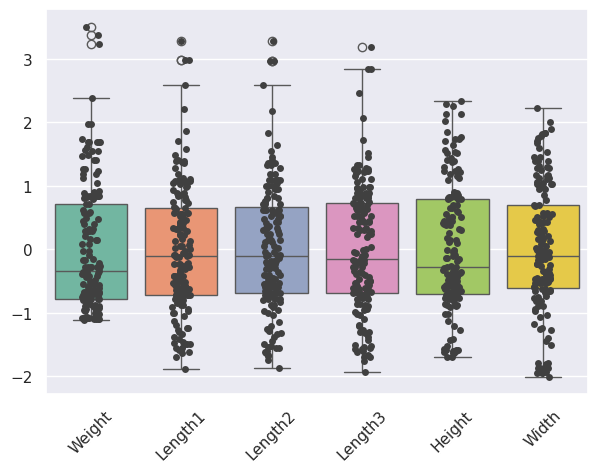

In [41]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

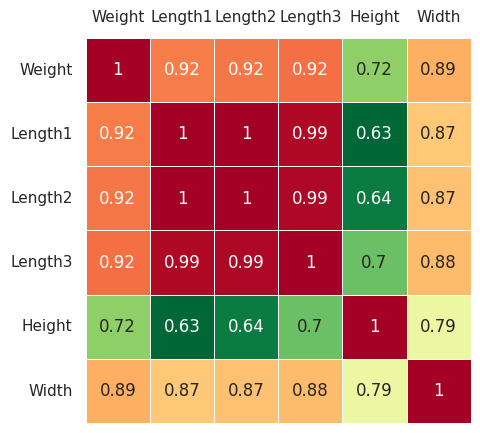

In [42]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

Text(0, 0.5, '')

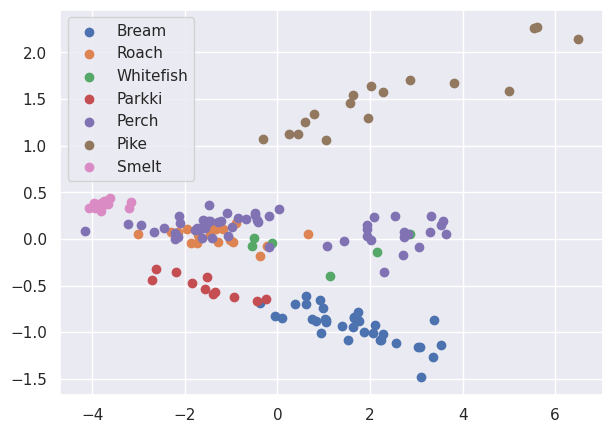

In [43]:
pca = PCA()
Z = pca.fit_transform(X)

idx_Bream = np.where(y == 'Bream')
idx_Roach = np.where(y == 'Roach')
idx_Whitefish= np.where(y == 'Whitefish')
idx_Parkki = np.where(y == 'Parkki')
idx_Perch = np.where(y == 'Perch')
idx_Pike= np.where(y == 'Pike')
idx_Smelt= np.where(y == 'Smelt')

plt. figure()
plt.scatter(Z[idx_Bream,0], Z[idx_Bream,1], label='Bream')
plt.scatter(Z[idx_Roach,0], Z[idx_Roach,1], label='Roach')
plt.scatter(Z[idx_Whitefish,0], Z[idx_Whitefish,1], label='Whitefish')
plt.scatter(Z[idx_Parkki,0], Z[idx_Parkki,1], label='Parkki')
plt.scatter(Z[idx_Perch,0], Z[idx_Perch,1], label='Perch')
plt.scatter(Z[idx_Pike,0], Z[idx_Pike,1], label='Pike')
plt.scatter(Z[idx_Smelt,0], Z[idx_Smelt,1], label='Smelt')

plt.legend()
plt.xlabel('')
plt.ylabel('')

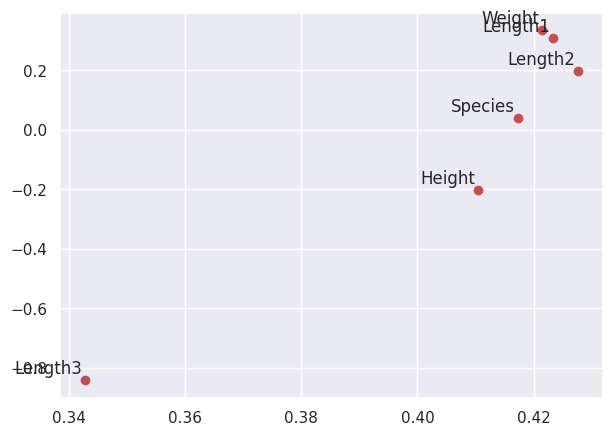

In [44]:
A = pca.components_.T

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('')
plt.ylabel('')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

invalid value encountered in sqrt


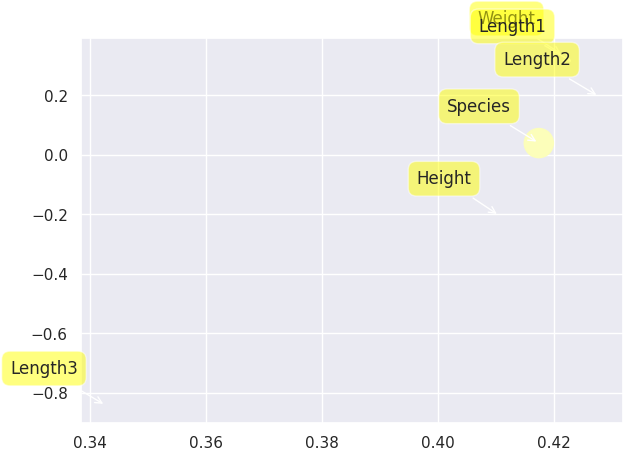

In [45]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('')
plt.ylabel('')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0, 0.5, 'Explained variance')

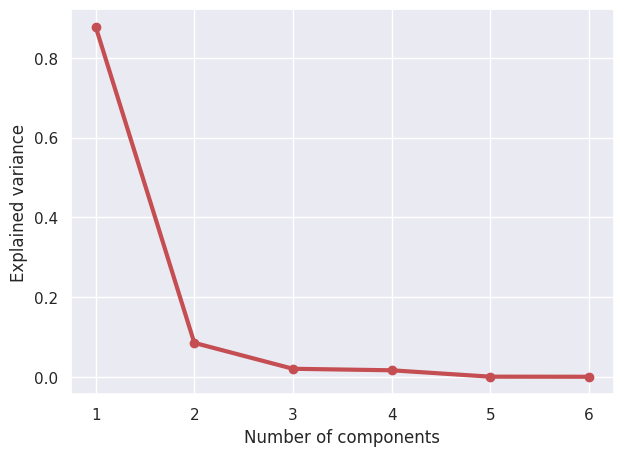

In [46]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Text(0, 0.5, 'Cumulative explained variance')

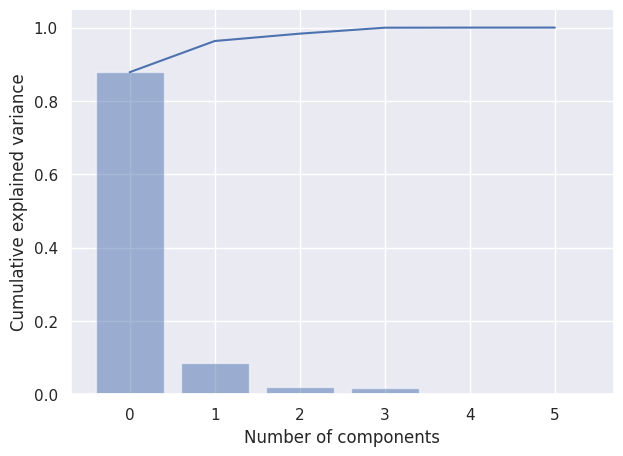

In [47]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

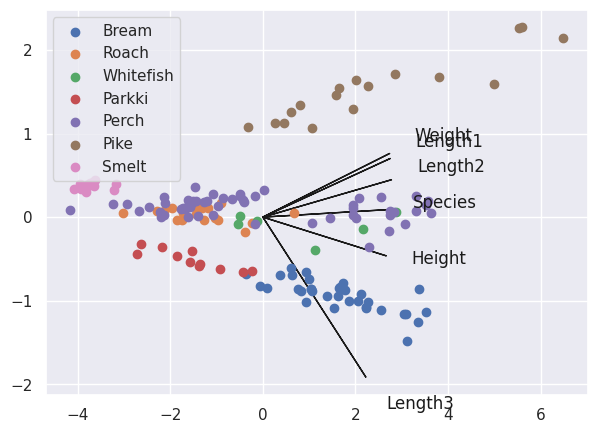

In [48]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('')
plt.ylabel('')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Bream,0], Z[idx_Bream,1], label='Bream')
plt.scatter(Z[idx_Roach,0], Z[idx_Roach,1], label='Roach')
plt.scatter(Z[idx_Whitefish,0], Z[idx_Whitefish,1], label='Whitefish')
plt.scatter(Z[idx_Parkki,0], Z[idx_Parkki,1], label='Parkki')
plt.scatter(Z[idx_Perch,0], Z[idx_Perch,1], label='Perch')
plt.scatter(Z[idx_Pike,0], Z[idx_Pike,1], label='Pike')
plt.scatter(Z[idx_Smelt,0], Z[idx_Smelt,1], label='Smelt')
plt.legend(loc='upper left')


In [49]:
!pip install pca

In [50]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [51]:
out['PC']

,PC1,PC2
0,-0.369223,-0.682427
1,-0.052464,-0.827850
2,0.093203,-0.848837
3,0.378876,-0.692796
4,0.626966,-0.696093
...,...,...
154,-3.667425,0.414093
155,-3.649135,0.376565
156,-3.614248,0.444107
157,-3.209690,0.327234


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '2 Principal Components explain [98.34%] of the variance'}, xlabel='PC1 (87.8% expl.var)', ylabel='PC2 (8.50% expl.var)'>)

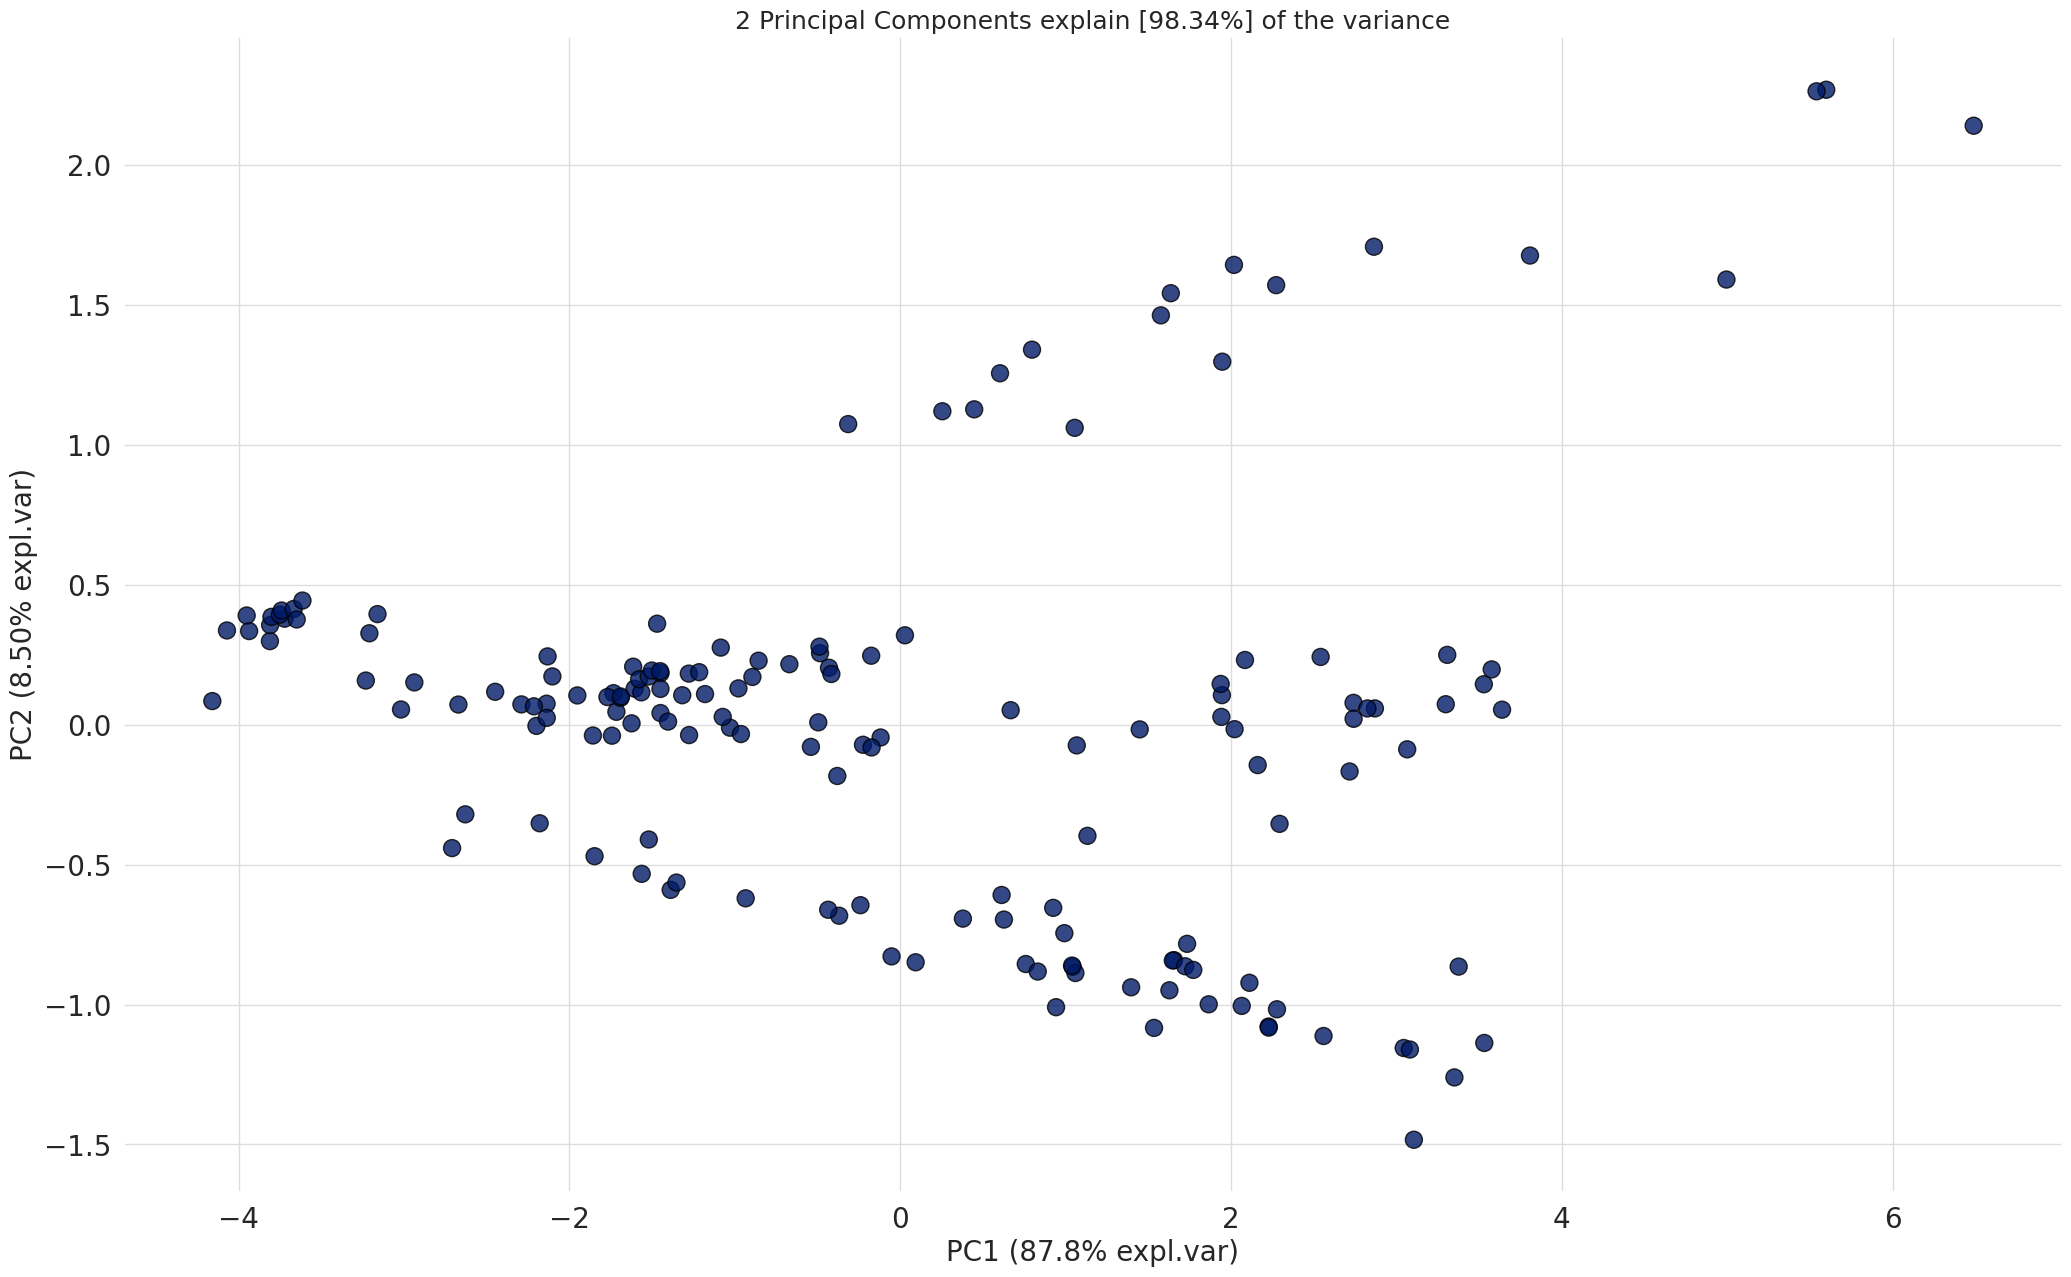

In [52]:
model.scatter(label=True, legend=False)

In [53]:
A = out['loadings'].T

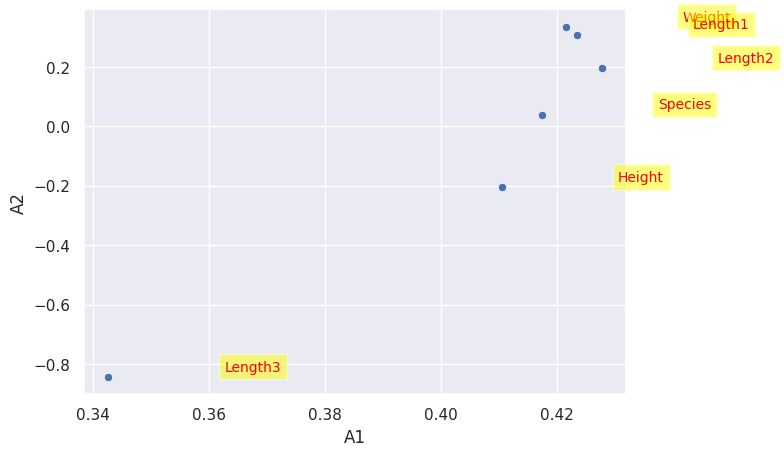

In [54]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

Text(0, 0.5, 'Explained variance')

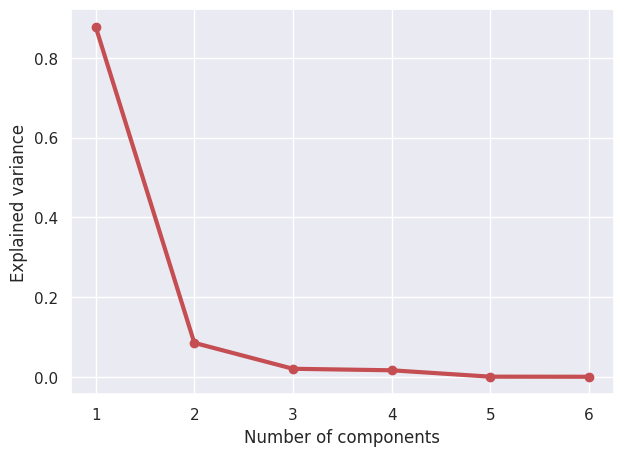

In [55]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

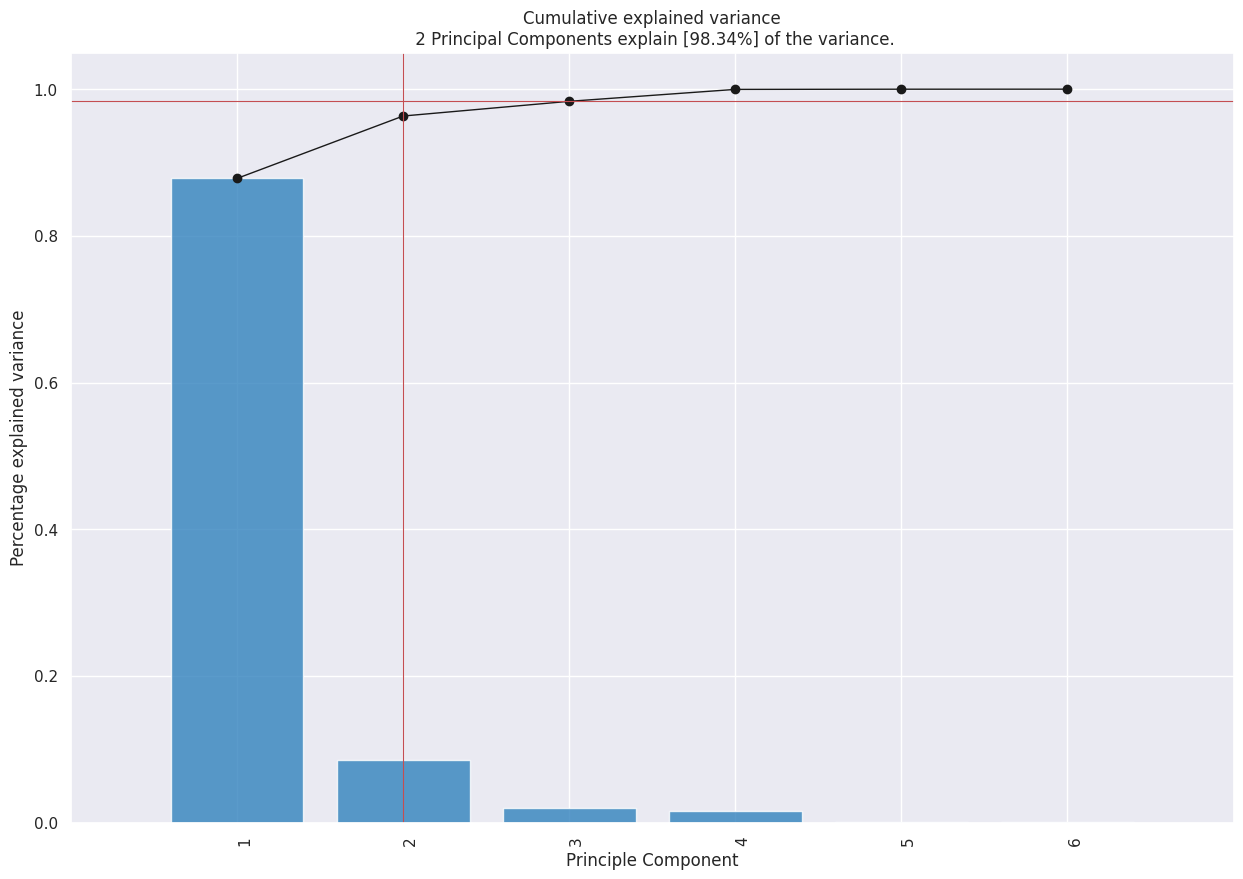

In [56]:
model.plot();

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '2 Principal Components explain [98.34%] of the variance'}, xlabel='PC1 (87.8% expl.var)', ylabel='PC2 (8.50% expl.var)'>)

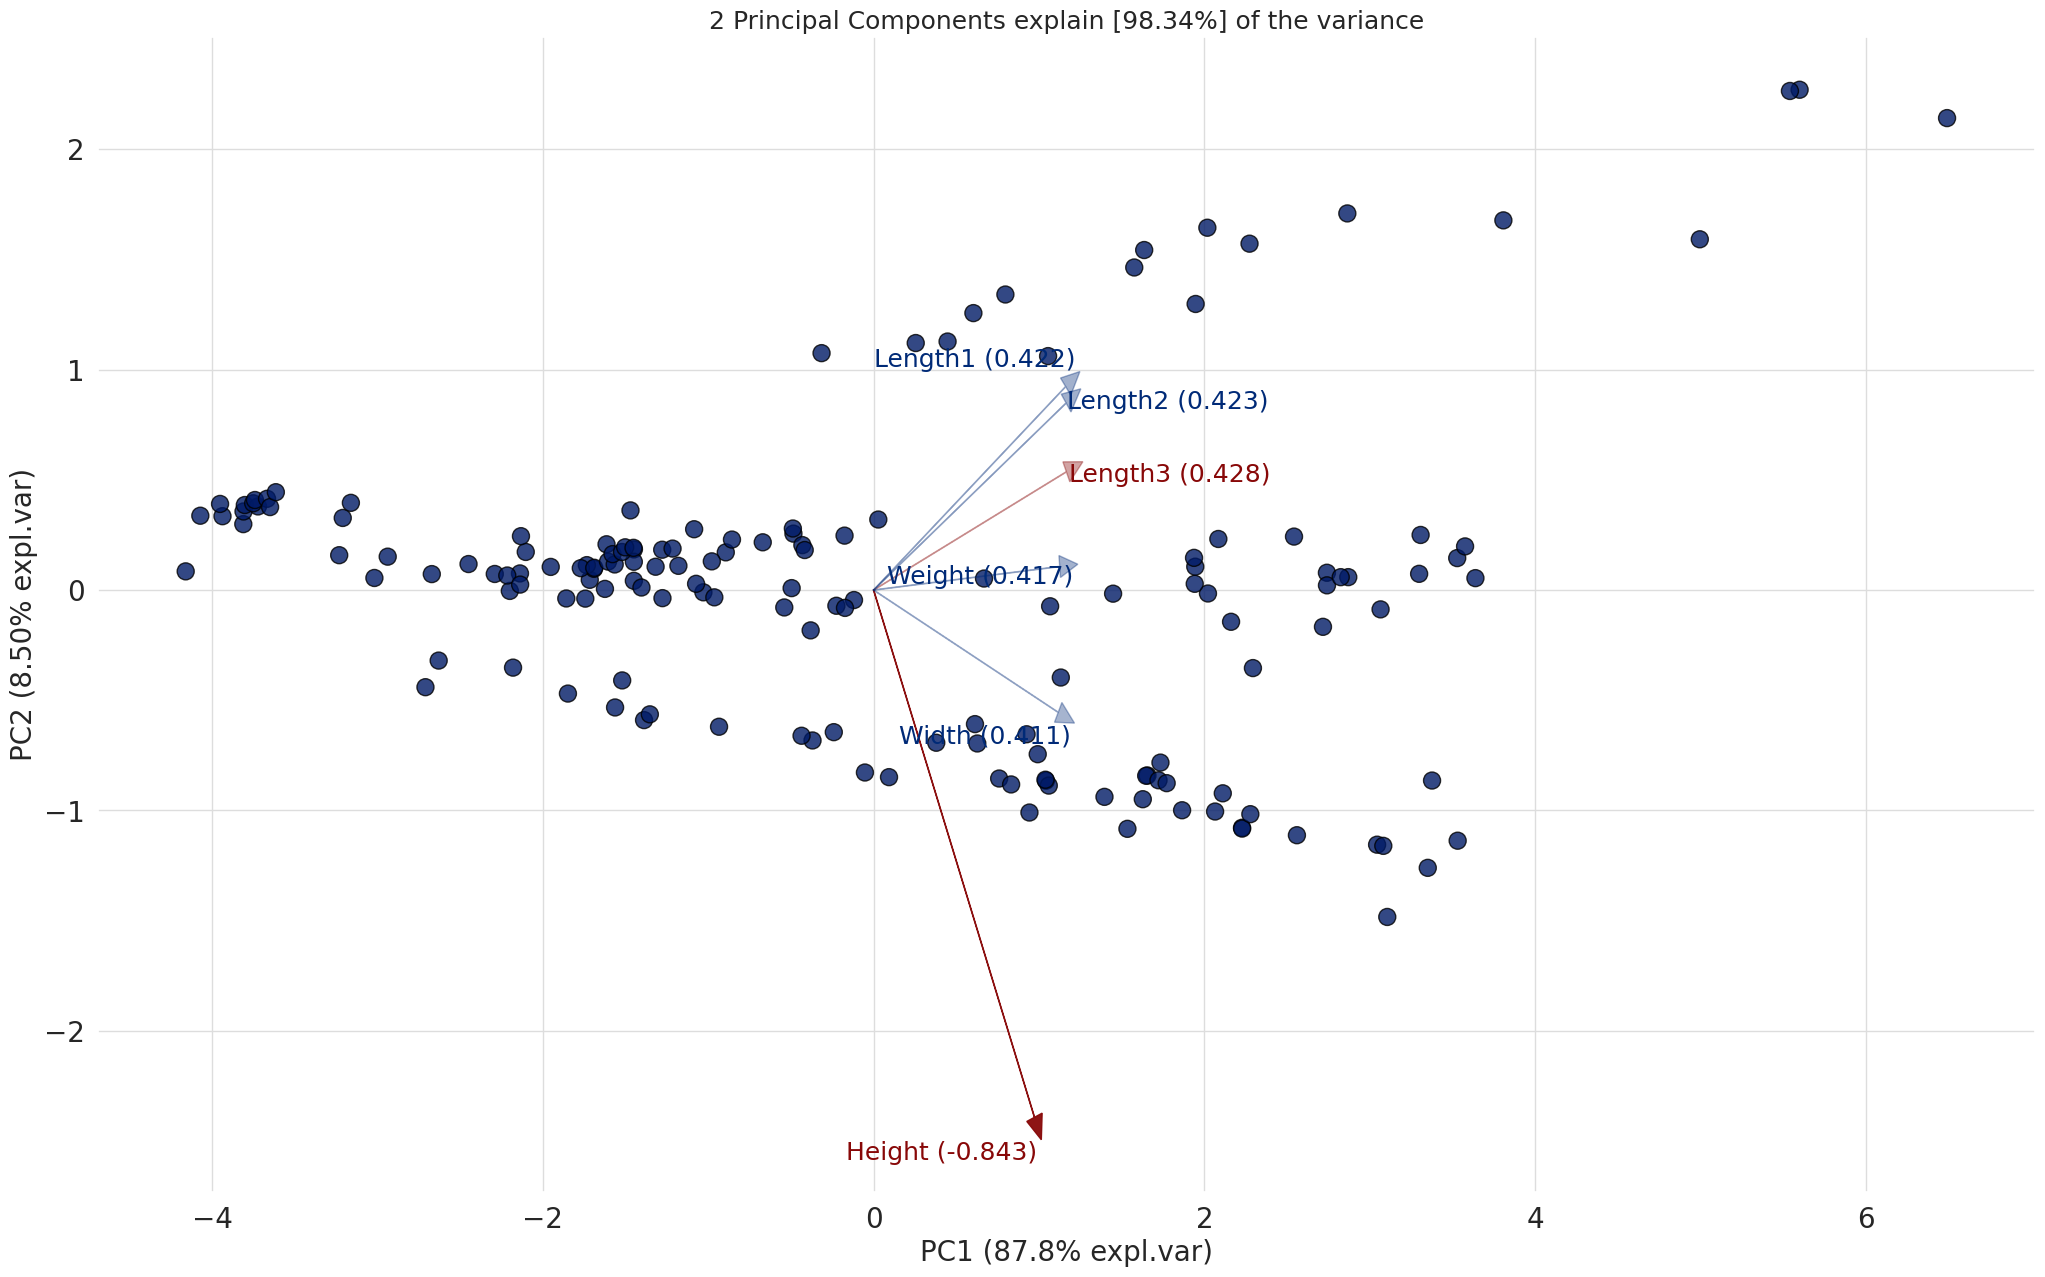

In [57]:
model.biplot(label=False, legend=False)

In [58]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (143, 7)
Unseen Data For Predictions: (16, 7)


In [59]:
from pycaret.classification import *
clf = setup(data=data, target='Species', train_size=0.7)

,Description,Value
0,Session id,1520
1,Target,Species
2,Target type,Multiclass
3,Target mapping,"Bream: 0, Parkki: 1, Perch: 2, Pike: 3, Roach: 4, Smelt: 5, Whitefish: 6"
4,Original data shape,"(143, 7)"
5,Transformed data shape,"(143, 7)"
6,Transformed train set shape,"(100, 7)"
7,Transformed test set shape,"(43, 7)"
8,Numeric features,6
9,Preprocess,True


In [60]:
#show the best model and their statistics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9600,0.0000,0.9600,0.9650,0.9583,0.9487,0.9533,0.0310
lr,Logistic Regression,0.9500,0.0000,0.9500,0.9400,0.9414,0.9349,0.9394,1.5040
ridge,Ridge Classifier,0.8600,0.0000,0.8600,0.7823,0.8093,0.8122,0.8305,0.0690
qda,Quadratic Discriminant Analysis,0.8000,0.0000,0.8000,0.6789,0.7246,0.7255,0.7532,0.0670
et,Extra Trees Classifier,0.7400,0.0000,0.7400,0.6990,0.7069,0.6631,0.6865,0.1690
xgboost,Extreme Gradient Boosting,0.7100,0.0000,0.7100,0.6778,0.6802,0.6193,0.6395,0.0940
rf,Random Forest Classifier,0.7000,0.0000,0.7000,0.6780,0.6772,0.6146,0.6296,0.3730
gbc,Gradient Boosting Classifier,0.7000,0.0000,0.7000,0.6398,0.6561,0.6019,0.6220,0.6760
lightgbm,Light Gradient Boosting Machine,0.7000,0.0000,0.7000,0.6590,0.6668,0.6107,0.6320,1.4950
dt,Decision Tree Classifier,0.6900,0.0000,0.6900,0.7007,0.6748,0.6082,0.6289,0.1110


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [61]:
best_model

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [62]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.0000,0.9000,0.9500,0.9067,0.8750,0.8861
1,0.9000,0.0000,0.9000,0.8500,0.8667,0.8718,0.8832
2,0.9000,0.0000,0.9000,0.8500,0.8667,0.8684,0.8801
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,0.0000,0.9000,1.0000,0.9429,0.8718,0.8838
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [63]:
lda

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [94]:
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.0000,0.9000,0.8200,0.8556,0.8630,0.8764
1,0.9000,0.0000,0.9000,0.8200,0.8556,0.8630,0.8764
2,0.7000,0.0000,0.7000,0.6400,0.6667,0.5946,0.6121
3,0.8000,0.0000,0.8000,0.6500,0.7143,0.7297,0.7526
4,0.8000,0.0000,0.8000,0.6500,0.7143,0.7297,0.7526
5,0.7000,0.0000,0.7000,0.5300,0.5917,0.6154,0.6606
6,0.7000,0.0000,0.7000,0.5500,0.6000,0.6053,0.6753
7,0.5000,0.0000,0.5000,0.4600,0.4778,0.3151,0.3291
8,0.8000,0.0000,0.8000,0.6667,0.7200,0.7059,0.7456


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [65]:
tuned_lda

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [66]:
!pip install statsmodels --upgrade

In [95]:
evaluate_model(tuned_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [68]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.0000,0.8000,0.7500,0.7667,0.7436,0.7533
1,0.5000,0.0000,0.5000,0.5333,0.4900,0.3827,0.4026
2,0.7000,0.0000,0.7000,0.7500,0.7095,0.6203,0.6364
3,0.7000,0.0000,0.7000,0.7667,0.7286,0.6203,0.6284
4,0.8000,0.0000,0.8000,0.9333,0.8167,0.7561,0.7951
5,0.8000,0.0000,0.8000,0.7500,0.7667,0.7368,0.7467
6,0.7000,0.0000,0.7000,0.8500,0.7429,0.6296,0.6460
7,0.9000,0.0000,0.9000,0.9500,0.9000,0.8667,0.8784
8,0.5000,0.0000,0.5000,0.4200,0.4500,0.3750,0.4181


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [69]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7000,0.0000,0.7000,0.6000,0.6381,0.6053,0.6225
1,0.5000,0.0000,0.5000,0.5250,0.4800,0.3750,0.4060
2,0.7000,0.0000,0.7000,0.7500,0.7095,0.6203,0.6364
3,0.7000,0.0000,0.7000,0.7667,0.7286,0.6203,0.6284
4,0.7000,0.0000,0.7000,0.6333,0.6600,0.6000,0.6083
5,0.8000,0.0000,0.8000,0.8333,0.7929,0.7468,0.7763
6,0.8000,0.0000,0.8000,0.8333,0.7833,0.7403,0.7706
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.6000,0.0000,0.6000,0.6500,0.6048,0.5062,0.5397


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [70]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [71]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.0000,0.8000,0.7500,0.7667,0.7436,0.7533
1,0.4000,0.0000,0.4000,0.4750,0.4257,0.2405,0.2501
2,0.8000,0.0000,0.8000,0.7500,0.7667,0.7368,0.7467
3,0.9000,0.0000,0.9000,0.9500,0.9095,0.8734,0.8849
4,0.7000,0.0000,0.7000,0.6400,0.6667,0.5890,0.5981
5,0.9000,0.0000,0.9000,0.8200,0.8556,0.8630,0.8764
6,0.6000,0.0000,0.6000,0.5667,0.5533,0.4444,0.4739
7,0.7000,0.0000,0.7000,0.5667,0.6200,0.5588,0.5903
8,0.7000,0.0000,0.7000,0.5800,0.6250,0.6104,0.6551


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [72]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7000,0.0000,0.7000,0.6000,0.6381,0.6053,0.6225
1,0.4000,0.0000,0.4000,0.4600,0.4150,0.2105,0.2230
2,0.8000,0.0000,0.8000,0.6667,0.7200,0.7143,0.7531
3,0.8000,0.0000,0.8000,0.7500,0.7667,0.7368,0.7467
4,0.8000,0.0000,0.8000,0.6667,0.7200,0.7143,0.7531
5,0.8000,0.0000,0.8000,0.6667,0.7200,0.7143,0.7531
6,0.8000,0.0000,0.8000,0.7200,0.7556,0.7260,0.7372
7,0.7000,0.0000,0.7000,0.5667,0.6200,0.5588,0.5903
8,0.7000,0.0000,0.7000,0.6800,0.6583,0.6000,0.6272


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [73]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [74]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.0000,0.5000,0.3500,0.3867,0.3243,0.3631
1,0.5000,0.0000,0.5000,0.4000,0.4429,0.3333,0.3484
2,0.6000,0.0000,0.6000,0.4833,0.5267,0.4737,0.4936
3,0.6000,0.0000,0.6000,0.5167,0.5286,0.4805,0.5073
4,0.7000,0.0000,0.7000,0.5286,0.5909,0.5522,0.6258
5,0.4000,0.0000,0.4000,0.4333,0.3933,0.1549,0.1657
6,0.4000,0.0000,0.4000,0.3333,0.3476,0.2208,0.2298
7,0.5000,0.0000,0.5000,0.4600,0.4444,0.2857,0.3053
8,0.3000,0.0000,0.3000,0.1867,0.2300,0.0789,0.0849


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [75]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4000,0.0000,0.4000,0.2750,0.3238,0.1892,0.1981
1,0.5000,0.0000,0.5000,0.3700,0.4214,0.3056,0.3271
2,0.7000,0.0000,0.7000,0.5033,0.5822,0.5833,0.6119
3,0.7000,0.0000,0.7000,0.6286,0.6242,0.5588,0.6292
4,0.6000,0.0000,0.6000,0.4733,0.5267,0.4444,0.4588
5,0.6000,0.0000,0.6000,0.4733,0.5267,0.4444,0.4588
6,0.4000,0.0000,0.4000,0.3133,0.3286,0.2105,0.2294
7,0.3000,0.0000,0.3000,0.1800,0.2222,0.0278,0.0305
8,0.3000,0.0000,0.3000,0.1524,0.2000,0.0411,0.0524


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [76]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [77]:
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7000,0.0000,0.7000,0.6000,0.6381,0.6053,0.6225
1,0.8000,0.0000,0.8000,0.6800,0.7250,0.7297,0.7643
2,0.8000,0.0000,0.8000,0.6667,0.7200,0.7143,0.7531
3,0.9000,0.0000,0.9000,0.8200,0.8556,0.8630,0.8764
4,0.9000,0.0000,0.9000,0.8200,0.8556,0.8630,0.8764
5,0.9000,0.0000,0.9000,0.8200,0.8556,0.8630,0.8764
6,0.9000,0.0000,0.9000,0.8200,0.8556,0.8630,0.8764
7,0.7000,0.0000,0.7000,0.6400,0.6667,0.5946,0.6203
8,0.8000,0.0000,0.8000,0.6800,0.7250,0.7368,0.7805


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [78]:
tuned_best_model

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [79]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [80]:
clf_pca = setup(data=data, target='Species', train_size=0.7, normalize = True, pca = True, pca_components = 2)

,Description,Value
0,Session id,1490
1,Target,Species
2,Target type,Multiclass
3,Target mapping,"Bream: 0, Parkki: 1, Perch: 2, Pike: 3, Roach: 4, Smelt: 5, Whitefish: 6"
4,Original data shape,"(143, 7)"
5,Transformed data shape,"(143, 3)"
6,Transformed train set shape,"(100, 3)"
7,Transformed test set shape,"(43, 3)"
8,Numeric features,6
9,Preprocess,True


In [81]:
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8200,0.0000,0.8200,0.8142,0.8028,0.7638,0.7779,0.1820
rf,Random Forest Classifier,0.8100,0.0000,0.8100,0.7957,0.7866,0.7486,0.7693,0.4870
qda,Quadratic Discriminant Analysis,0.7900,0.0000,0.7900,0.7702,0.7667,0.7192,0.7349,0.1390
dt,Decision Tree Classifier,0.7600,0.0000,0.7600,0.7770,0.7506,0.6944,0.7088,0.0860
lda,Linear Discriminant Analysis,0.7600,0.0000,0.7600,0.6387,0.6876,0.6726,0.7024,0.0430
nb,Naive Bayes,0.7500,0.0000,0.7500,0.7358,0.7275,0.6671,0.6840,0.0940
gbc,Gradient Boosting Classifier,0.7500,0.0000,0.7500,0.7443,0.7367,0.6736,0.6898,1.1030
xgboost,Extreme Gradient Boosting,0.7500,0.0000,0.7500,0.7097,0.7180,0.6668,0.6876,0.0930
lightgbm,Light Gradient Boosting Machine,0.7500,0.0000,0.7500,0.7388,0.7288,0.6703,0.6886,0.8840
knn,K Neighbors Classifier,0.7100,0.0000,0.7100,0.6147,0.6481,0.6071,0.6337,0.1600


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [82]:
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.0000,0.9000,0.9500,0.9095,0.8734,0.8849
1,0.7000,0.0000,0.7000,0.9333,0.7100,0.6512,0.7094
2,0.8000,0.0000,0.8000,0.8000,0.8000,0.7403,0.7500
3,0.8000,0.0000,0.8000,0.9500,0.8167,0.7590,0.7877
4,0.6000,0.0000,0.6000,0.6500,0.5933,0.5181,0.5377
5,0.8000,0.0000,0.8000,0.8500,0.8000,0.7531,0.7625
6,0.7000,0.0000,0.7000,0.5800,0.6250,0.6154,0.6508
7,0.6000,0.0000,0.6000,0.7000,0.6333,0.4667,0.4730
8,0.6000,0.0000,0.6000,0.8500,0.6267,0.5181,0.5660


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [83]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [84]:
!pip install shap

In [85]:
!pip install shap

In [86]:
import shap

In [87]:
rf_pca = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.0000,0.9000,0.9500,0.9095,0.8734,0.8849
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9000,0.0000,0.9000,0.8200,0.8556,0.8630,0.8764
3,0.9000,0.0000,0.9000,0.9500,0.9067,0.8750,0.8861
4,0.6000,0.0000,0.6000,0.4750,0.5286,0.4595,0.4739
5,0.9000,0.0000,0.9000,0.9250,0.8905,0.8734,0.8849
6,0.7000,0.0000,0.7000,0.5500,0.6000,0.6053,0.6753
7,0.8000,0.0000,0.8000,0.7667,0.7533,0.7101,0.7479
8,0.6000,0.0000,0.6000,0.8000,0.6667,0.5000,0.5265


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [88]:
tuned_rf_pca = tune_model(rf_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.0000,0.9000,0.8200,0.8556,0.8630,0.8764
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8000,0.0000,0.8000,0.7200,0.7556,0.7260,0.7372
3,0.8000,0.0000,0.8000,0.7500,0.7667,0.7436,0.7533
4,0.6000,0.0000,0.6000,0.4750,0.5286,0.4595,0.4739
5,0.9000,0.0000,0.9000,0.9250,0.8905,0.8734,0.8849
6,0.7000,0.0000,0.7000,0.5500,0.6000,0.6053,0.6753
7,0.8000,0.0000,0.8000,0.7667,0.7533,0.7101,0.7479
8,0.8000,0.0000,0.8000,0.7200,0.7556,0.7183,0.7298


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


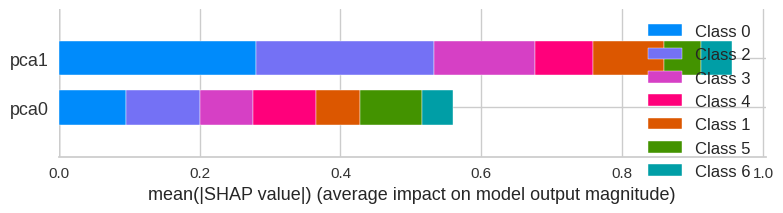

In [89]:
interpret_model(tuned_rf_pca, plot='summary')

In [91]:
interpret_model(tuned_rf_pca, plot='reason')